In [4]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [7]:
n  =  8 
n_q  =  n 
n_b  =  n 
qc_output  =  QuantumCircuit ( n_q , n_b )

In [8]:
for j in range(n):
    qc_output.measure(j, j)

In [9]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

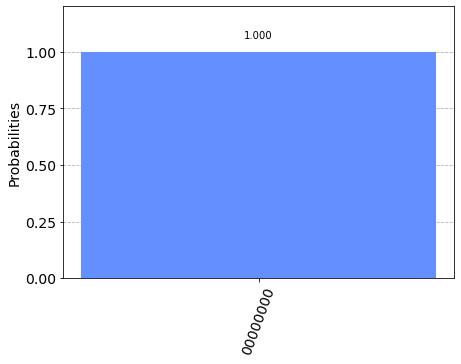

In [10]:
sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc_output)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [17]:
"""qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw()"""
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(5)
qc_encode.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘
q_6: ─────
          
q_7: ─────

In [18]:
qc = qc_encode + qc_output
qc.draw()

┌─┐                  
q_0: ─────┤M├──────────────────
     ┌───┐└╥┘            ┌─┐   
q_1: ┤ X ├─╫─────────────┤M├───
     └───┘ ║ ┌─┐         └╥┘   
q_2: ──────╫─┤M├──────────╫────
           ║ └╥┘┌─┐       ║    
q_3: ──────╫──╫─┤M├───────╫────
           ║  ║ └╥┘┌─┐    ║    
q_4: ──────╫──╫──╫─┤M├────╫────
     ┌───┐ ║  ║  ║ └╥┘    ║ ┌─┐
q_5: ┤ X ├─╫──╫──╫──╫─────╫─┤M├
     └┬─┬┘ ║  ║  ║  ║     ║ └╥┘
q_6: ─┤M├──╫──╫──╫──╫─────╫──╫─
      └╥┘  ║  ║  ║  ║ ┌─┐ ║  ║ 
q_7: ──╫───╫──╫──╫──╫─┤M├─╫──╫─
       ║   ║  ║  ║  ║ └╥┘ ║  ║ 
c: 8/══╩═══╩══╩══╩══╩══╩══╩══╩═
       6   0  2  3  4  7  1  5

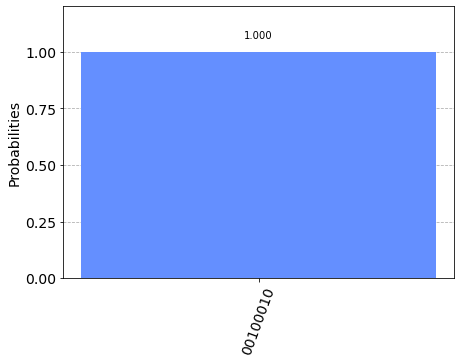

In [19]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)